<a href="https://colab.research.google.com/github/MadhurMohare/MarketAnalysis/blob/main/MarketingDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

In [3]:
df = pd.read_csv('bank.csv', sep = ';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
def balancer(x):
  if x < 72:
    return 'Class E'
  elif x >= 72 and x < 448:
    return 'Class D'
  elif x >= 448 and x < 1428:
    return 'Class C'
  elif x >= 1428 and x < df['balance'].quantile(0.99):
    return 'Class B'
  else:
    return 'Class A'

In [5]:
df['y'] = df['y'].apply(lambda x: True if x == 'yes' else False)
df['default'] = df['default'].apply(lambda x: True if x == 'yes' else False)
df['housing'] = df['housing'].apply(lambda x: True if x == 'yes' else False)
df['loan'] = df['loan'].apply(lambda x: True if x == 'yes' else False)
df['previous_bool'] = df['previous'].apply(lambda x: True if x != 0 else False)
df['balance_class'] = df['balance'].apply(balancer)

to_drop = ['previous','day','poutcome','pdays']
df.drop(to_drop, axis = 1, inplace = True)
df

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,y,previous_bool,balance_class
0,58,management,married,tertiary,False,2143,True,False,unknown,may,261,1,False,False,Class B
1,44,technician,single,secondary,False,29,True,False,unknown,may,151,1,False,False,Class E
2,33,entrepreneur,married,secondary,False,2,True,True,unknown,may,76,1,False,False,Class E
3,47,blue-collar,married,unknown,False,1506,True,False,unknown,may,92,1,False,False,Class B
4,33,unknown,single,unknown,False,1,False,False,unknown,may,198,1,False,False,Class E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,False,825,False,False,cellular,nov,977,3,True,False,Class C
45207,71,retired,divorced,primary,False,1729,False,False,cellular,nov,456,2,True,False,Class B
45208,72,retired,married,secondary,False,5715,False,False,cellular,nov,1127,5,True,True,Class B
45209,57,blue-collar,married,secondary,False,668,False,False,telephone,nov,508,4,False,False,Class C


In [6]:
x = df.drop(['y','balance','duration'], axis = 1)
y = df['y']

In [7]:
oe = OrdinalEncoder()
X = oe.fit_transform(x)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42, stratify = y)

In [9]:
dt = GridSearchCV(DecisionTreeClassifier(random_state = 42),{}, n_jobs=1,cv = 10, refit='recall')
dt.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42), n_jobs=1,
             param_grid={}, refit='recall')

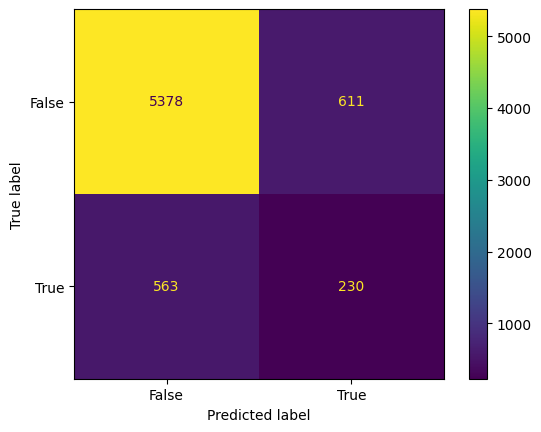

In [10]:
ConfusionMatrixDisplay.from_estimator(dt, x_test, y_test)

In [11]:
pred = dt.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.91      0.90      0.90      5989
        True       0.27      0.29      0.28       793

    accuracy                           0.83      6782
   macro avg       0.59      0.59      0.59      6782
weighted avg       0.83      0.83      0.83      6782



In [12]:
params = {
    "max_depth": [5, 10, 20, 25, 30, None],
    "criterion": ["gini", "entropy"],
    "min_samples_split": [2, 3],
    "min_samples_leaf": [1, 2]
}

model_dt = GridSearchCV(DecisionTreeClassifier(random_state = 42), params,cv = 10, verbose=2)
model_dt.fit(x_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 25, 30, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3]},
             verbose=2)

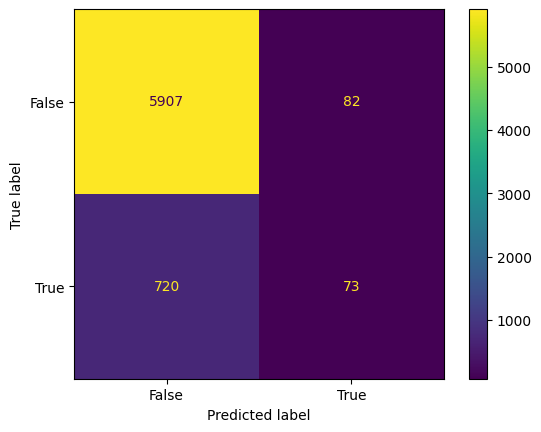

In [14]:
ConfusionMatrixDisplay.from_estimator(model_dt, x_test, y_test)

In [13]:
pred_dt = model_dt.predict(x_test)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

       False       0.89      0.99      0.94      5989
        True       0.47      0.09      0.15       793

    accuracy                           0.88      6782
   macro avg       0.68      0.54      0.55      6782
weighted avg       0.84      0.88      0.84      6782

